<a href="https://colab.research.google.com/github/ngochif/fngochi_64061/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**An Application of Text Classification on a Small Conflict and Security Dataset**



I. **Data Preparation**

*Data Preparation*

In [1]:
import pandas as pd

# URL for fetching the CSV data
url = "https://api.acleddata.com/acled/read.csv?key=WssCFAvEzfzv1P9V6CRu&email=xxxxxxxx&year=2024"


In [2]:
# Fetching the CSV data from the web and reading it into a DataFrame
df = pd.read_csv(url)
# Selecting only the required columns
df = df[['civilian_targeting', 'notes']]

In [3]:
# Specifying the column types explicitly
column_types = {
    'civilian_targeting': 'str',
    'notes': 'str'
}
# Change column types for the selected columns
df = df.astype(column_types)
print(df.head())

  civilian_targeting                                              notes
0                nan  On 3 May 2024, protesters held a large Houthi-...
1                nan  On 3 May 2024, protesters held a large Houthi-...
2                nan  On 3 May 2024, protesters held a large Houthi-...
3                nan  On 3 May 2024, in Comodoro Rivadavia (Chubut),...
4                nan  On 3 May 2024, a number of residents gathered ...


In [4]:
#Labeling classes by imputing 1 for civilian targeting and 0 for not civilian targeting (nan)
import numpy as np
df['civilian_targeting'] = df['civilian_targeting'].astype(str)
df['civilian_targeting'] = np.where(df['civilian_targeting'].str.contains('Civilian targeting', na=False), 1, 0)
df.head(20)

,civilian_targeting,notes
0,0,"On 3 May 2024, protesters held a large Houthi-..."
1,0,"On 3 May 2024, protesters held a large Houthi-..."
2,0,"On 3 May 2024, protesters held a large Houthi-..."
3,0,"On 3 May 2024, in Comodoro Rivadavia (Chubut),..."
4,0,"On 3 May 2024, a number of residents gathered ..."
5,0,"On 3 May 2024, JNIM militants attacked a posit..."
6,1,"On 3 May 2024, JNIM or IS Sahel militants kill..."
7,0,"On 3 May 2024, demonstrators, including Februa..."
8,0,"On 3 May 2024, demonstrators, including Februa..."
9,0,"On 3 May 2024, demonstrators, including Februa..."


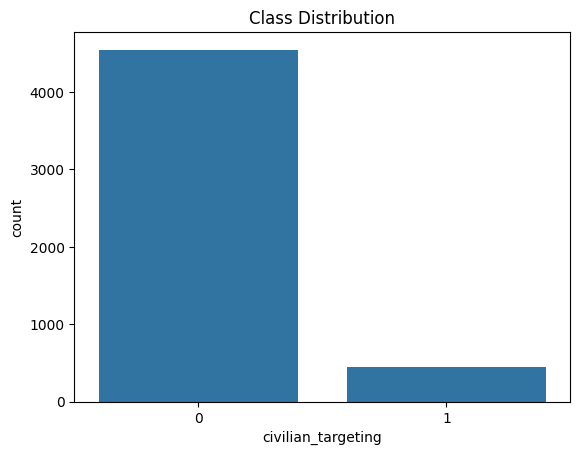

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# If using pandas DataFrame
sns.countplot(x='civilian_targeting', data=df)
plt.title('Class Distribution')
plt.show()

In [6]:
# Get unique classes
unique_classes = df['civilian_targeting'].unique()
print("Unique classes in the dataset:", unique_classes)

# Count of each class
class_counts = df['civilian_targeting'].value_counts()
print("Count of each class:\n", class_counts)

Unique classes in the dataset: [0 1]
Count of each class:
 civilian_targeting
0    4549
1     451
Name: count, dtype: int64


*Creating a balanced dataset*

In [7]:
count_class_0, count_class_1 = df['civilian_targeting'].value_counts()

# Divide by class
df_class_0 = df[df['civilian_targeting'] == 0]
df_class_1 = df[df['civilian_targeting'] == 1]

# Randomly sample from the majority class
df_class_0_under = df_class_0.sample(count_class_1)
df = pd.concat([df_class_0_under, df_class_1], axis=0)

print(df['civilian_targeting'].value_counts())  # This should now be balanced

civilian_targeting
0    451
1    451
Name: count, dtype: int64


*Exploratory Data Analysis*

In [8]:
df['sequence_length'] = df['notes'].apply(lambda x: len(x.split()))
# Display summary statistics
print(df['sequence_length'].describe())

#Number of elements in each class
class_counts = df['civilian_targeting'].value_counts()
print(class_counts)

count    902.000000
mean      42.594235
std       22.177407
min       12.000000
25%       28.000000
50%       38.500000
75%       52.000000
max      241.000000
Name: sequence_length, dtype: float64
civilian_targeting
0    451
1    451
Name: count, dtype: int64


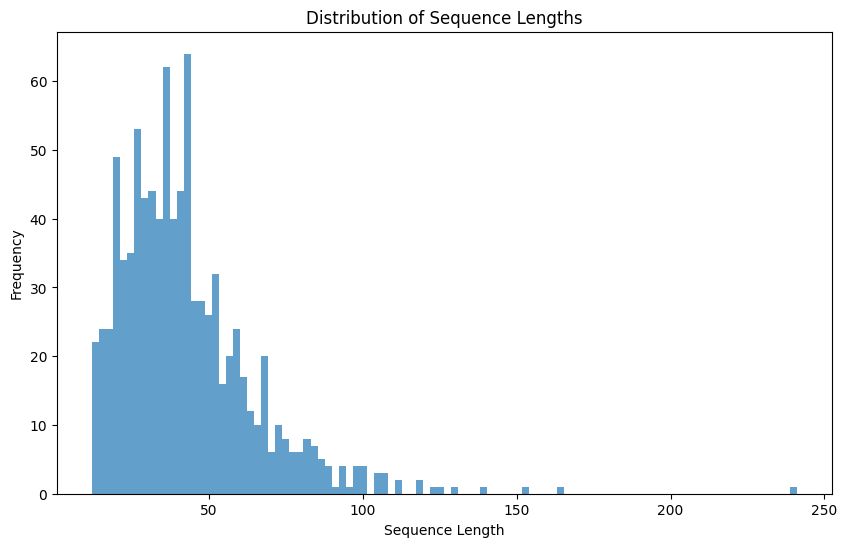

In [9]:
# Plotting the text length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sequence_length'], bins=100, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

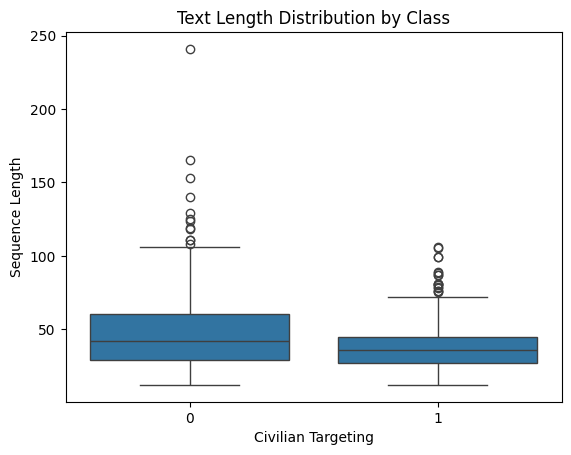

In [54]:
#Class-wise text length distribution
sns.boxplot(x='civilian_targeting', y='sequence_length', data=df)
plt.title('Text Length Distribution by Class')
plt.xlabel('Civilian Targeting')
plt.ylabel('Sequence Length')
plt.show()

*Splitting the Data for Training, Validation and Testing*

In [10]:
from sklearn.model_selection import train_test_split

# Define the proportions for splits
test_size = 0.2  # 20% for testing
validation_size = 0.25  # 25% of the remaining 80% (i.e., 20% of total) for validation

# First split to separate out the test dataset
train_val, test = train_test_split(df, test_size=test_size, stratify=df['civilian_targeting'], random_state=42)

# Second split to separate out the validation dataset from the remaining training dataset
train, val = train_test_split(train_val, test_size=validation_size, stratify=train_val['civilian_targeting'], random_state=42)

# Print the size of each split to verify correct proportions
print("Training Set:")
print(train['civilian_targeting'].value_counts())

print("Validation Set:")
print(val['civilian_targeting'].value_counts())

print("Test Set:")
print(test['civilian_targeting'].value_counts())

Training Set:
civilian_targeting
1    270
0    270
Name: count, dtype: int64
Validation Set:
civilian_targeting
1    91
0    90
Name: count, dtype: int64
Test Set:
civilian_targeting
0    91
1    90
Name: count, dtype: int64


**Training a sequential model**

*Tokenizing from Text to Sequences*

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)  # Keeps the 10,000 most frequent words
tokenizer.fit_on_texts(train['notes'])  # Fit the tokenizer on the training data

# Tokenize and convert to sequences
train_sequences = tokenizer.texts_to_sequences(train['notes'])
val_sequences = tokenizer.texts_to_sequences(val['notes'])
test_sequences = tokenizer.texts_to_sequences(test['notes'])

# Pad sequences to ensure uniform length
max_length = max(len(x) for x in train_sequences)

train_padded = pad_sequences(train_sequences, maxlen=max_length)
val_padded = pad_sequences(val_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

# Convert labels to tensors
train_labels = tf.convert_to_tensor(train['civilian_targeting'])
val_labels = tf.convert_to_tensor(val['civilian_targeting'])
test_labels = tf.convert_to_tensor(test['civilian_targeting'])

*Leveraging and LSTM model*

In [52]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

history = model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels))

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_9 (Embedding)     (None, None, 256)         5120000   
                                                                 
 bidirectional_8 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5194049 (19.81 MB)
Trainable params: 5194049 (19.81 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [53]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_acc:.4f}')

6/6 [==============================] - 0s 43ms/step - loss: 0.2918 - accuracy: 0.8895
Test Accuracy: 0.8895


**Using a Transformer architecture**

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

*Training the Model*

In [48]:
def transformer_encoder(inputs, num_heads, ff_dim, rate=0.1):
    # Multi-head attention
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attention_output = layers.Dropout(rate)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward layer
    ff_output = keras.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(inputs.shape[-1]),
        layers.Dropout(rate)
    ])(attention_output)
    ff_output = layers.LayerNormalization(epsilon=1e-6)(attention_output + ff_output)

    return ff_output

In [49]:
history = model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels))

Epoch 1/20
17/17 [==============================] - 4s 228ms/step - loss: 0.1675 - accuracy: 0.9204 - val_loss: 0.3835 - val_accuracy: 0.8619
Epoch 2/20
17/17 [==============================] - 8s 466ms/step - loss: 0.1578 - accuracy: 0.9444 - val_loss: 0.3835 - val_accuracy: 0.8785
Epoch 3/20
17/17 [==============================] - 6s 362ms/step - loss: 0.2027 - accuracy: 0.9130 - val_loss: 0.4046 - val_accuracy: 0.8564
Epoch 4/20
17/17 [==============================] - 4s 246ms/step - loss: 0.1501 - accuracy: 0.9370 - val_loss: 0.4037 - val_accuracy: 0.8674
Epoch 5/20
17/17 [==============================] - 5s 293ms/step - loss: 0.1706 - accuracy: 0.9370 - val_loss: 0.3989 - val_accuracy: 0.8619
Epoch 6/20
17/17 [==============================] - 4s 222ms/step - loss: 0.1394 - accuracy: 0.9333 - val_loss: 0.4177 - val_accuracy: 0.8564
Epoch 7/20
17/17 [==============================] - 4s 229ms/step - loss: 0.1446 - accuracy: 0.9463 - val_loss: 0.4276 - val_accuracy: 0.8564
Epoch 

*Model performance*

In [50]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_acc:.4f}')

6/6 [==============================] - 0s 43ms/step - loss: 0.3259 - accuracy: 0.9061
Test Accuracy: 0.9061
